# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Librarry를 사용할 때 보다 어렵다.
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리

In [39]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv",header=None)
test = pd.read_csv("../Data/test_1k.csv",header=None)
print(train.head())
print(test.head())
print(train.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
### Preprocessing(전처리)

In [40]:
# null
train.isnull().sum().sum()

0

In [41]:
test.isnull().sum().sum()

0

In [42]:
# train과 test를 Feature와 Target으로 분리하고 정규화하기
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:,train.columns != 0]
train_data = train_data / 255 # 어두운 부분은 max값이 작음 컬럼별 비율이 달라질수 있으므로 255로 나눔

test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:,test.columns != 0]
test_data = test_data / 255

print(train_label[0:5])
print(train_data[0:5])
print("*"*20)
print(test_label[0:5])
print(test_data[0:5])

   0
0  5
1  0
2  4
3  1
4  9
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
********************
   0
0  7
1  2
2  1
3  0
4  4
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

### Deep Learning Model 만들기


In [43]:
# GPU 사용 설정
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [44]:
from tensorflow import keras

In [45]:
train_data.shape

(20001, 784)

In [46]:
model = keras.Sequential()
model.add(keras.layers.Dense(512,activation='relu',input_shape=(784,))) # 은닉층
# 512 => 은닉층의 node 개수, 컬럼갯수 : 784
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층
# 10 => 출력층의 node 개수

In [47]:
model.compile(
    optimizer = 'adam', # loss가 좋은 걸 채택하면 됨
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [49]:
# 데이터 훈련하기
import numpy as np

model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs=10
)

Epoch 1/10
626/626 [==============================] - 2s 3ms/step - loss: 0.0126 - accuracy: 0.9962
Epoch 2/10
626/626 [==============================] - 2s 3ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 3/10
626/626 [==============================] - 2s 3ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 4/10
626/626 [==============================] - 2s 4ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 5/10
626/626 [==============================] - 2s 4ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 6/10
626/626 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 7/10
626/626 [==============================] - 2s 3ms/step - loss: 0.0102 - accuracy: 0.9965
Epoch 8/10
626/626 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 9/10
626/626 [==============================] - 2s 3ms/step - loss: 6.9922e-04 - accuracy: 0.9999
Epoch 10/10
626/626 [==============================] - 2s 4ms/step - loss: 1.3657e-04 - accuracy

---
### 테스트 데이터로 평가하기

In [50]:
score = model.evaluate(test_data,np.array(test_label))

32/32 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9770


In [51]:
print("loss :",score[0])
print("accuracy :",score[1])

loss : 0.10077858716249466
accuracy : 0.9770230054855347


---
### test_data로 predict해보기


In [52]:
pred = model.predict(test_data)
print("test_label :",test_label[:10])
print("pred :",np.argmax(pred[:10],axis=1))

32/32 [==============================] - 0s 2ms/step
test_label :    0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
pred : [7 2 1 0 4 1 4 9 6 9]


In [53]:
np.argmax(np.array([1,4,3,2]))

1

### 출력층의 node개수를 1로 할 경우, 에러발생

In [ ]:
# model = keras.Sequential()
# model.add(keras.layers.Dense(512,activation='relu',input_shape=(784,))) # 은닉층
# # 512 => 은닉층의 node 개수
# model.add(keras.layers.Dense(1,activation='softmax')) # 출력층
# # 1 => 출력층의 node 개수

In [ ]:
# model.compile(
#     optimizer = 'adam', # loss가 좋은 걸 채택하면 됨
#     loss = 'sparse_categorical_crossentropy', 
#     metrics = ['accuracy']
# )

In [ ]:
# # 데이터 훈련하기
# import numpy as np

# model.fit(
#     np.array(train_data),
#     np.array(train_label),
#     epochs=50
# )

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/tj/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/tj/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/tj/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_3629/817897231.py", line 4, in <module>
      model.fit(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/tj/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 1).  Label values: 7 9 3 5 2 2 0 7 1 2 4 3 3 3 4 2 8 7 3 1 5 0 2 4 1 1 4 3 6 7 1 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_127013]

---
# 번외 : Image 만들기

In [54]:
from PIL import Image

In [55]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:,train.columns !=0]
train1.shape

(20001, 784)

In [57]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [59]:
# Image만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [60]:
# image 저장하기
image.save("../Data/mnist_test3.jpg","JPEG")

---
# 이미지를 불러서 Predict 해보기

In [61]:
# Image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

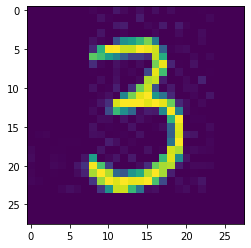

In [62]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [63]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [64]:
# image를 1차원 배열로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [65]:
imgArray3 = imgArray2.tolist()

In [67]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T

In [68]:
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
print("예측값 :",np.argmax(model.predict(dfArray),axis=1))

1/1 [==============================] - 0s 25ms/step
예측값 : [3]


In [70]:
model.predict(dfArray)

1/1 [==============================] - 0s 20ms/step


array([[3.8164567e-12, 7.0015904e-09, 1.1102812e-09, 9.9999976e-01,
        1.6667506e-14, 1.7619709e-07, 6.9983482e-16, 3.4355870e-15,
        2.2039152e-11, 5.8704135e-09]], dtype=float32)